In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import os

In [2]:
# retreive csv file and create df from csv file
file_path = os.path.join("gdp.csv")
file_path2 = os.path.join("alc.csv")
file_path3 = os.path.join("hours.csv")
gdp_df = pd.read_csv(file_path)
alcohol_df = pd.read_csv(file_path2)
hours_df = pd.read_csv(file_path3)

In [3]:
hours_gdp_merge = pd.merge(hours_df, gdp_df, on=["Entity", "Year"])
hours_gdp_merge = hours_gdp_merge.dropna(how='any')
hours_gdp_merge


,Entity,Code_x,Year,(Annual hours worked per worker),Code_y,Population density (people per km² of land area),GDP per capita (constant 2011 international $),Total population (Gapminder)
40,Argentina,ARG,1990,1850.00,ARG,11.959608,10815.715123,32729739.0
41,Argentina,ARG,1991,1837.96,ARG,12.129221,12015.627105,33193918.0
42,Argentina,ARG,1992,1826.00,ARG,12.297758,13266.052863,33655151.0
43,Argentina,ARG,1993,1850.34,ARG,12.464297,13861.946178,34110917.0
44,Argentina,ARG,1994,1875.00,ARG,12.627705,14481.108203,34558115.0
...,...,...,...,...,...,...,...,...
3442,Vietnam,VNM,2012,2346.89,VNM,291.714390,4821.137231,90451881.0
3443,Vietnam,VNM,2013,2339.95,VNM,295.087319,5024.438902,91497725.0
3444,Vietnam,VNM,2014,2339.95,VNM,298.464589,5264.828100,92544915.0
3445,Vietnam,VNM,2015,2339.95,VNM,301.775622,5554.858056,93571567.0


In [4]:
hours_gdp_merge["Entity"].unique()

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh',
       'Barbados', 'Belgium', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saint Lucia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Thailand', 'Trinidad and Tobago', 'Turkey', 'United Kingdom',
       'United States', 'Uruguay', 'Venezuela', 'Vietnam'], dtype=object)

In [5]:
hours_gdp_sorted = hours_gdp_merge.groupby("Entity").mean()
hours_gdp_sorted = hours_gdp_sorted.sort_values("GDP per capita (constant 2011 international $)")
hours_gdp_sorted


,Year,(Annual hours worked per worker),Population density (people per km² of land area),GDP per capita (constant 2011 international $),Total population (Gapminder)
Entity,,,,,
Bangladesh,2003.0,2183.065556,1051.632110,1985.736875,1.368910e+08
Cambodia,2004.5,2477.365417,73.974118,2016.456044,1.305791e+07
Vietnam,2003.0,2369.975556,261.149638,3260.066887,8.230125e+07
Pakistan,2003.0,2320.542593,192.756177,3833.370475,1.485919e+08
Philippines,2003.0,2110.786296,277.414973,4872.322808,8.271682e+07
...,...,...,...,...,...
United States,2003.0,1788.627778,31.566491,45955.916040,2.887788e+08
Switzerland,2003.0,1637.792222,188.118996,51791.021624,7.425017e+06
Norway,2003.0,1450.797407,12.702736,57593.789012,4.646213e+06


In [6]:
gdp_hours_sorted = hours_gdp_merge.groupby("Entity").mean()
gdp_hours_sorted = gdp_hours_sorted.sort_values(" (Annual hours worked per worker)")
gdp_hours_sorted


,Year,(Annual hours worked per worker),Population density (people per km² of land area),GDP per capita (constant 2011 international $),Total population (Gapminder)
Entity,,,,,
Netherlands,2003.0,1446.153704,476.744651,41146.911787,1.611176e+07
Germany,2003.0,1449.887037,233.956443,37740.004642,8.115890e+07
Norway,2003.0,1450.797407,12.702736,57593.789012,4.646213e+06
Denmark,2003.0,1461.166667,127.549069,41589.962436,5.404809e+06
France,2003.0,1541.400370,113.972412,34639.894419,6.072487e+07
...,...,...,...,...,...
Thailand,2003.0,2330.522963,124.765916,11046.045044,6.374166e+07
Costa Rica,2003.0,2353.808148,79.625705,11037.641083,4.065689e+06
Vietnam,2003.0,2369.975556,261.149638,3260.066887,8.230125e+07


In [7]:
hours_gpd_countries = ["Netherlands", "Germany", "South Korea", "Cambodia", "Bangladesh", "Luxembourg", "Singapore", "Norway", "United States"]


In [8]:
hours_gdp_countries_df = []

for country in hours_gpd_countries:
    hours_gdp_countries_df.append(hours_gdp_merge.loc[hours_gdp_merge["Entity"] == country, :])


Text(0.5, 1.0, 'Average Annual Hours Worked Per Worker Over Time')

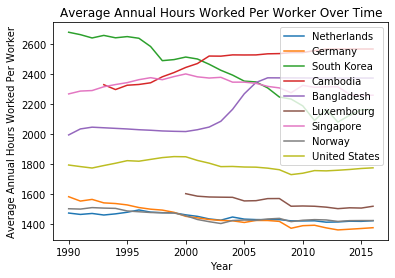

In [9]:
for df in hours_gdp_countries_df:
    plt.plot(df["Year"], df[" (Annual hours worked per worker)"], label = df.iloc[0,0])
    plt.legend(loc = "best")

plt.xlabel("Year")
plt.ylabel("Average Annual Hours Worked Per Worker")
plt.title("Average Annual Hours Worked Per Worker Over Time")


Text(0.5, 1.0, 'GDP Per Capita Over Time')

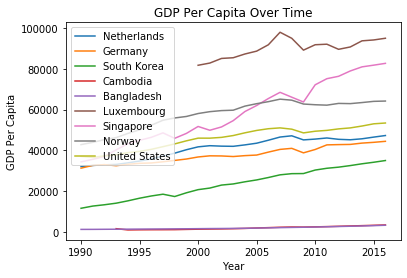

In [10]:
for df in hours_gdp_countries_df:
    plt.plot(df["Year"], df["GDP per capita (constant 2011 international $)"], label = df.iloc[0,0])
    plt.legend(loc = "best")

plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title("GDP Per Capita Over Time")


In [11]:
hours_alcohol_merge = pd.merge(hours_df, alcohol_df, on=["Entity", "Year"])
hours_alcohol_merge = hours_alcohol_merge.dropna(how='any')
hours_alcohol_merge


,Entity,Code_x,Year,(Annual hours worked per worker),Code_y,Per capita alcohol consumption (litres per person per year)
0,Australia,AUS,1960,2104.44,AUS,7.1
1,Australia,AUS,1970,2044.27,AUS,9.5
2,Australia,AUS,1980,2019.80,AUS,9.7
3,Australia,AUS,1990,1967.63,AUS,8.1
4,Australia,AUS,2000,1968.61,AUS,8.1
...,...,...,...,...,...,...
97,United States,USA,1970,1887.81,USA,7.4
98,United States,USA,1980,1799.01,USA,7.7
99,United States,USA,1990,1793.35,USA,6.5
100,United States,USA,2000,1848.21,USA,6.7


In [12]:
hours_alcohol_sorted = hours_alcohol_merge.groupby("Entity").mean()
hours_alcohol_sorted = hours_alcohol_sorted.sort_values("Per capita alcohol consumption (litres per person per year)")
hours_alcohol_sorted


,Year,(Annual hours worked per worker),Per capita alcohol consumption (litres per person per year)
Entity,,,
Finland,1985.666667,1840.418333,5.183333
Norway,1985.666667,1636.851667,5.366667
Japan,1985.666667,2037.575000,5.833333
Sweden,1985.666667,1657.393333,5.850000
Canada,1985.666667,1853.383333,6.583333
United States,1985.666667,1837.040000,6.850000
Netherlands,1985.666667,1603.605000,7.216667
New Zealand,1985.666667,1854.796667,7.533333
United Kingdom,1985.666667,1801.163333,7.616667


In [13]:
alcohol_hours_sorted = hours_alcohol_merge.groupby("Entity").mean()
alcohol_hours_sorted = alcohol_hours_sorted.sort_values(" (Annual hours worked per worker)")
alcohol_hours_sorted


,Year,(Annual hours worked per worker),Per capita alcohol consumption (litres per person per year)
Entity,,,
Netherlands,1985.666667,1603.605000,7.216667
Norway,1985.666667,1636.851667,5.366667
Denmark,1985.666667,1640.748333,8.450000
Sweden,1985.666667,1657.393333,5.850000
Germany,1985.666667,1718.458333,11.166667
Belgium,1985.666667,1736.548333,10.200000
Switzerland,1985.666667,1759.936667,9.883333
France,1985.666667,1782.426667,12.933333
United Kingdom,1985.666667,1801.163333,7.616667


In [17]:
hours_alcohol_countries = ["Japan", "Australia", "Norway", "Netherlands", "France", "Germany", "Finland", "Sweden", "United States"]


In [18]:
hours_alcohol_countries_df = []

for country in hours_alcohol_countries:
    hours_alcohol_countries_df.append(hours_alcohol_merge.loc[hours_alcohol_merge["Entity"] == country, :])
    

Text(0.5, 1.0, 'Average Annual Hours Worked Per Worker Over Time')

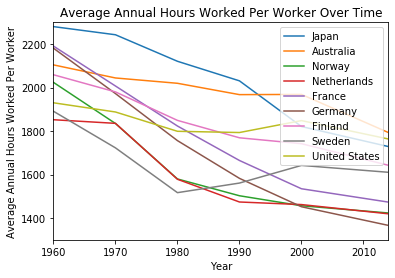

In [37]:
for df in hours_alcohol_countries_df:
    plt.plot(df["Year"], df[" (Annual hours worked per worker)"], label = df.iloc[0,0])
    plt.legend(loc = "best")

plt.xlim(1960, 2014)
plt.ylim(1300, 2300)
plt.xlabel("Year")
plt.ylabel("Average Annual Hours Worked Per Worker")
plt.title("Average Annual Hours Worked Per Worker Over Time")


Text(0.5, 1.0, 'Average Annual Hours Worked Per Worker Over Time')

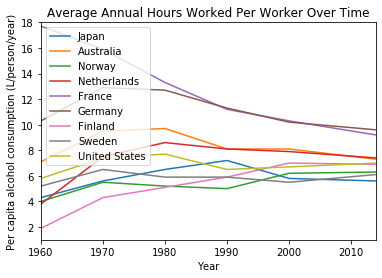

In [38]:
for df in hours_alcohol_countries_df:
    plt.plot(df["Year"], df["Per capita alcohol consumption (litres per person per year)"], label = df.iloc[0,0])
    plt.legend(loc = "best")

plt.xlim(1960, 2014)
plt.ylim(1, 18)
plt.xlabel("Year")
plt.ylabel("Per capita alcohol consumption (L/person/year)")
plt.title("Average Annual Hours Worked Per Worker Over Time")
